#  Chapter 2 - Regression

## Machine learning with scikit-learn

> In this chapter, you will be introduced to regression, and build models to predict sales values using a dataset on advertising expenditure. You will learn about the mechanics of linear regression and common performance metrics such as R-squared and root mean squared error. You will perform k-fold cross-validation, and apply regularization to regression models to reduce the risk of overfitting.

In [1]:
import pandas as pd
import numpy as np
import warnings

pd.set_option('display.expand_frame_repr', False)

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)


## Introduction to regression



Predicting blood glucose levels:

In [2]:
df = pd.read_csv('./datasets/diabetes_clean.csv', index_col=None)
df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Creating feature and target arrays:

In [3]:
diabetes_df = df.loc[(df['glucose'] != 0) & (df['bmi'] != 0)].copy()
X = diabetes_df.drop("glucose", axis=1).values
y = diabetes_df["glucose"].values

print(type(X), type(y))
display(X[:5,:])

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


array([[6.000e+00, 7.200e+01, 3.500e+01, 0.000e+00, 3.360e+01, 6.270e-01,
        5.000e+01, 1.000e+00],
       [1.000e+00, 6.600e+01, 2.900e+01, 0.000e+00, 2.660e+01, 3.510e-01,
        3.100e+01, 0.000e+00],
       [8.000e+00, 6.400e+01, 0.000e+00, 0.000e+00, 2.330e+01, 6.720e-01,
        3.200e+01, 1.000e+00],
       [1.000e+00, 6.600e+01, 2.300e+01, 9.400e+01, 2.810e+01, 1.670e-01,
        2.100e+01, 0.000e+00],
       [0.000e+00, 4.000e+01, 3.500e+01, 1.680e+02, 4.310e+01, 2.288e+00,
        3.300e+01, 1.000e+00]])

Making predictions from a single feature:

In [4]:
X_bmi = X[:,4]
print(X_bmi[:5])
print(y.shape, X_bmi.shape) # confirm its shape

# sklearn uses 2D data, so we reshape it
X_bmi = X_bmi.reshape(-1, 1)
print(X_bmi.shape)

[33.6 26.6 23.3 28.1 43.1]
(752,) (752,)
(752, 1)


Plotting glucose vs. body mass index:

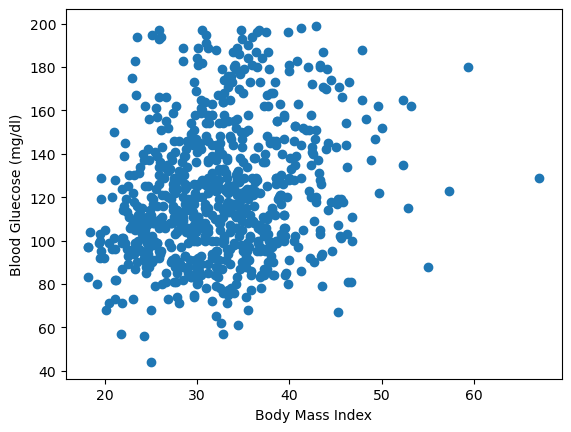

In [5]:
import matplotlib.pyplot as plt

plt.scatter(X_bmi, y)
plt.ylabel("Blood Gluecose (mg/dl)")
plt.xlabel("Body Mass Index")
plt.show()

Creating and fitting a regression model

In [6]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_bmi, y)

LinearRegression()

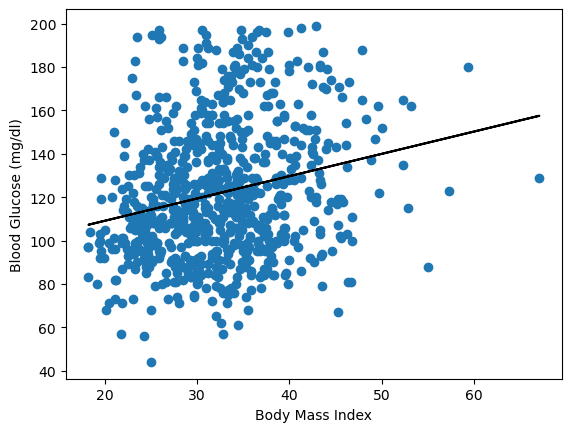

In [7]:
predictions = reg.predict(X_bmi)
plt.scatter(X_bmi,y)
plt.plot(X_bmi, predictions, color='black')
plt.ylabel("Blood Glucose (mg/dl)")
plt.xlabel("Body Mass Index")
plt.show()


### Creating features

In this chapter, you will work with a dataset called `sales_df`, which contains information on advertising campaign expenditure across different media types, and the number of dollars generated in sales for the respective campaign. 

The dataset has been preloaded for you. Here are the first two rows:

|   | tv      | radio    | social_media | sales     |
|---|---------|----------|--------------|-----------|
| 1 | 13000.0 | 9237.76  | 2409.57      | 46677.90  |
| 2 | 41000.0 | 15886.45 | 2913.41      | 150177.83 |

You will use the advertising expenditure as features to predict sales values, initially working with the `radio` column. However, before you make any predictions you will need to create the feature and target arrays, reshaping them to the correct format for `scikit-learn`.

Instructions:
- Create `X`, an array of the values from the `sales_df` DataFrame's "radio" column.
- Create `y`, an array of the values from the `sales_df` DataFrame's "sales" column.
- Reshape `X` into a two-dimensional `NumPy` array.
- Print the shape of `X` and `y`.

In [8]:
sales_df = pd.read_csv('./datasets/advertising_and_sales_clean.csv', index_col=None)
sales_df.head()

,tv,radio,social_media,influencer,sales
0,16000.0,6566.23,2907.98,Mega,54732.76
1,13000.0,9237.76,2409.57,Mega,46677.90
2,41000.0,15886.45,2913.41,Mega,150177.83
3,83000.0,30020.03,6922.30,Mega,298246.34
4,15000.0,8437.41,1406.00,Micro,56594.18


In [9]:
import numpy as np

# Create X from the radio column's values (.values to make sure they are numpy array)
X = sales_df['radio'].values

# Create y from the sales column's values
y = sales_df['sales'].values

# Reshape X
X = X.reshape(-1,1)

# Check the shape of the features and targets
print(X.shape, y.shape)

(4546, 1) (4546,)


### Building a linear regression model

Now you have created your **feature** and **target** arrays, you will train a **linear regression model** on all feature and target values.

As the goal is to assess the relationship between the **feature** and **target** values there is no need to split the data into **training** and **test** sets.

X and y have been preloaded for you as follows:

```python
y = sales_df["sales"].values
X = sales_df["radio"].values.reshape(-1, 1)
```

Instructions:
- Import `LinearRegression`.
- Instantiate a linear regression model.
- Predict sales values using `X`, storing as predictions.

In [10]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X,y)

# Make predictions
predictions = reg.predict(X)

print(predictions[:5])

[ 95491.17119147 117829.51038393 173423.38071499 291603.11444202
 111137.28167129]


 See how sales values for the first five predictions range from $95,000 to over $290,000. Let's visualize the model's fit.

### Visualizing a linear regression model

Now you have built your linear regression model and trained it using all available observations, you can visualize how well the model fits the data. This allows you to interpret the relationship between radio advertising expenditure and sales values.

The variables `X`, an array of radio values, `y`, an array of sales values, and `predictions`, an array of the model's predicted values for `y` given X, have all been preloaded for you from the previous exercise.

Instructions:
- `Import matplotlib.pyplot as plt`.
- Create a scatter plot visualizing `y` against `X`, with observations in blue.
- Draw a red line plot displaying the predictions against `X`.
- Display the plot.

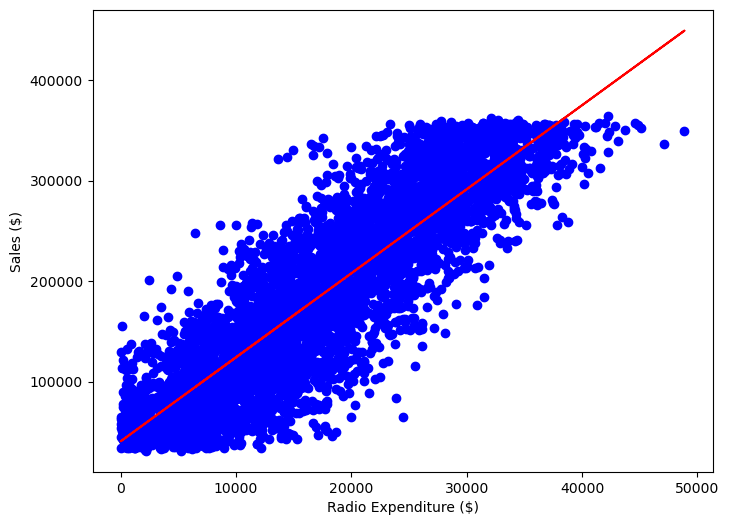

In [11]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))

# Create scatter plot
plt.scatter(X, y, color="blue")

# Create line plot
plt.plot(X, predictions, color="red")
plt.xlabel("Radio Expenditure ($)")
plt.ylabel("Sales ($)")

# Display the plot
plt.show()

The model nicely captures a near-perfect linear correlation between radio advertising expenditure and sales! Now let's take a look at what is going on under the hood to calculate this relationship.

## The basics of linear regression

![](./images/regression1.png)

![](./images/regression2.png)

![](./images/regression3.png)

To advoice, the positive Residuals cancel out the negative ones, we use Residual Sum of Squares (RSS). We aim to minimize the RSS.

![](./images/regression4.png)

![](./images/regression5.png)


In [12]:
# Linear regression using all features

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Create X from the radio column's values (.values to make sure they are numpy array)
features = ["tv",	"radio",	"social_media"]
X = sales_df[features].values

# Create y from the sales column's values
y = sales_df['sales'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)

![](./images/regression6.png)

r-squared in linear regression range from 0 to 1.

R-squared values range from 0 to 1 and are commonly stated as percentages from 0% to 100%. 

The R-squared may need to be above 0.95 for a regression model to be considered reliable.

In [13]:
# R-squared in scikit-learn
reg_all.score(X_test, y_test)

0.9990152104759368

![](./images/mse.png)

In [14]:
# RMSE in scikit-learn
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

2944.4331996000956


### Fit and predict for regression

Now you have seen how linear regression works, your task is to create a multiple linear regression model using all of the features in the `sales_df` dataset, which has been preloaded for you. 

As a reminder, here are the first two rows:

|   | tv      | radio    | social_media | sales     |
|---|---------|----------|--------------|-----------|
| 1 | 13000.0 | 9237.76  | 2409.57      | 46677.90  |
| 2 | 41000.0 | 15886.45 | 2913.41      | 150177.83 |

You will then use this model to predict sales based on the values of the test features.

LinearRegression and `train_test_split` have been preloaded for you from their respective modules.

Instructions:
- Create `X`, an array containing values of all features in `sales_df`, and `y`, containing all values from the "sales" column.
- Instantiate a linear regression model.
- Fit the model to the training data.
- Create `y_pred`, making predictions for sales using the test features.


In [15]:
# Create X and y arrays
X = sales_df.drop(["sales","influencer"], axis=1).values
y = sales_df["sales"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

Predictions: [53176.66154234 70996.19873235], Actual Values: [55261.28 67574.9 ]


 The first two predictions appear to be within around 5% of the actual values from the test set!

### Regression performance

Now you have fit a model, reg, using all features from sales_df, and made predictions of sales values, you can evaluate performance using some common regression metrics.

The variables ```X_train, X_test, y_train, y_test, y_pred```, along with the fitted model, reg, all from the last exercise, have been preloaded for you.

Your task is to find out how well the features can explain the variance in the target values, along with assessing the model's ability to make predictions on unseen data.

Instructions:
- Import `mean_squared_error`.
- Calculate the model's R-squared score by passing the test feature values and the test target values to an appropriate method.
- Calculate the model's root mean squared error using `y_test` and `y_pred`.
- Print `r_squared` and `rmse`.

In [16]:
# Import mean_squared_error
from sklearn.metrics import mean_squared_error

# Compute R-squared
r_squared = reg.score(X_test, y_test)

# Compute RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

R^2: 0.9990152104759368
RMSE: 2944.4331996000956


Wow, the features explain 99.9% of the variance in sales values! Looks like this company's advertising strategy is working well!


## Cross-validation

Cross-validation motivation:
- Model performance is dependent on the way we split up the data
- Not representative of the model's ability to generalize to unseen data
> Solution: Cross-validation!

![](./images/cv1.png)

Cross-validation and model performance: 
- 5 folds = 5-fold CV
- 10 folds = 10-fold CV
- k folds = k-fold CV
- More folds = More computationally expensive

In [17]:
# Create X and y arrays
X = sales_df.drop(["tv","sales","influencer"], axis=1).values
y = sales_df["sales"].values
print(X.shape)

(4546, 2)


In [18]:
# Cross-validation in scikit-learn
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=6, shuffle=True, random_state=42)
reg = LinearRegression()

cv_results = cross_val_score(reg, X, y, cv=kf)

# Evaluating cross-validation peformance
print(cv_results)
# [0.70262578, 0.7659624, 0.75188205, 0.76914482, 0.72551151, 0.73608277]
print(np.mean(cv_results), np.std(cv_results))
# 0.7418682216666667 0.023330243960652888
print(np.quantile(cv_results, [0.025, 0.975]))

[0.75187559 0.76589813 0.75262628 0.76412429 0.72538175 0.76308008]
0.7538310201432022 0.013854887619993653
[0.72869348 0.7656764 ]


the results are an array (each fold's result). The result is R-squared as it is the default metric for linear regression.  

### Cross-validation for R-squared

Cross-validation is a vital approach to evaluating a model. It maximizes the amount of data that is available to the model, as the model is not only trained but also tested on all of the available data.

In this exercise, you will build a linear regression model, then use 6-fold cross-validation to assess its accuracy for predicting sales using social media advertising expenditure. You will display the individual score for each of the six-folds.

The `sales_df` dataset has been split into `y` for the target variable, and `X` for the features, and preloaded for you. `LinearRegression` has been imported from `sklearn.linear_model`.

Instructions:
- Import `KFold` and `cross_val_score`.
- Create kf by calling `KFold()`, setting the number of splits to six, shuffle to True, and setting a seed of 5.
- Perform cross-validation using reg on `X` and `y`, passing `kf` to `cv`.
- Print the `cv_scores`.

In [19]:
# Import the necessary modules
from sklearn.model_selection import cross_val_score, KFold

# Create a KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=5)

reg = LinearRegression()

# Compute 6-fold cross-validation scores
cv_scores = cross_val_score(reg, X, y, cv=kf)

# Print scores
print(sorted(cv_scores))

[0.7410405953473244, 0.7440648389752186, 0.7445167799488566, 0.7517002165180923, 0.7684211440715619, 0.7724188737556701]


Notice how R-squared for each fold ranged between 0.74 and 0.77? By using cross-validation, we can see how performance varies depending on how the data is split!


### Analyzing cross-validation metrics

Now you have performed cross-validation, it's time to analyze the results.

You will display the mean, standard deviation, and 95% confidence interval for `cv_results`, which has been preloaded for you from the previous exercise.

`numpy` has been imported for you as `np`.

Instructions:
- Calculate and print the mean of the results.
- Calculate and print the standard deviation of `cv_results`.
- Display the 95% confidence interval for your results using `np.quantile()`.

In [20]:
# Print the mean
print(np.mean(cv_results))

# Print the standard deviation
print(np.std(cv_results))

# Print the 95% confidence interval
print(np.quantile(cv_results, [0.025, 0.975]))

0.7538310201432022
0.013854887619993653
[0.72869348 0.7656764 ]


An average score of 0.75 with a low standard deviation is pretty good for a model out of the box! Now let's learn how to apply regularization to our regression models.

## Regularized regression

Why regularize?
- Recall: Linear regression minimizes a loss function
- It chooses a coefficient, a, for each feature variable, plus b
- Large coefficient can lead to overfitting
- Regularization: Penalize large coefficients


### Ridge regression
$$
Loss \: function = OLS \: loss \: function + α ∗ \sum\nolimits_{i = 1}^{n}{a_i^2}
$$

Ridge penalizes large positive or negative coe)cients
α: parameter we need to choose
Picking α is similar to picking k in KNN
Hyperparameter: variable used to optimize model parameters
α controls model complexity
- α = 0 = OLS (Can lead to overfitting)
- Very high α: Can lead to underfitting



In [21]:
X = diabetes_df.drop("glucose", axis=1).values
y = diabetes_df["glucose"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
# Ridge regression in scikit-learn
from sklearn.linear_model import Ridge
scores = []
for alpha in [0.1, 1.0, 10.0, 100.0, 1000.0, 10000]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    scores.append(ridge.score(X_test, y_test))
    
print(scores)

[0.35378781259988523, 0.3536407299494274, 0.3512426958613931, 0.3110510827436759, 0.22518335310369975, 0.19760748574775489]


### Lasso regression
$$

Loss function = OLS \: loss \: function + α ∗ \sum\nolimits_{i = 1}^{n}{|a_i|}

$$

In [23]:
from sklearn.linear_model import Lasso
scores = []

for alpha in [0.01, 1.0, 10.0, 20.0, 50.0]:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    lasso_pred = lasso.predict(X_test)
    scores.append(lasso.score(X_test, y_test))
    
print(scores)

[0.3538284414885491, 0.3438049456776029, 0.19833321142742255, 0.18342320274518353, 0.14538765319821068]


USE Lasso regression for feature selection:
- Lasso can select important features of a dataset
- Shrinks the coefficients of less important features to zero
- Features not shrunk to zero are selected by lasso

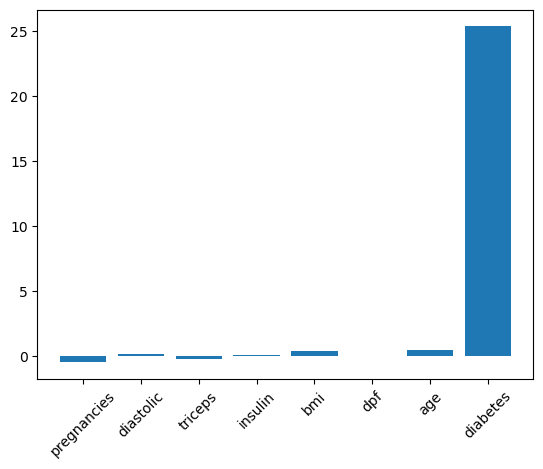

In [24]:
# Lasso for feature selection in scikit-learn
from sklearn.linear_model import Lasso

X = diabetes_df.drop("glucose", axis=1).values
y = diabetes_df["glucose"].values
names = diabetes_df.drop("glucose", axis=1).columns


lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_

plt.bar(names, lasso_coef)
plt.xticks(rotation=45)
plt.show()

### Exercise: Regularized regression: Ridge


Ridge regression performs regularization by computing the squared values of the model parameters multiplied by alpha and adding them to the loss function.

In this exercise, you will fit ridge regression models over a range of different alpha values, and print their  scores. You will use all of the features in the sales_df dataset to predict "sales". The data has been split into `X_train`, `X_test`, `y_train`, `y_test` for you.

A variable called alphas has been provided as a list containing different alpha values, which you will loop through to generate scores.

Instructions:
- Import Ridge.
- Instantiate Ridge, setting alpha equal to alpha.
- Fit the model to the training data.
- Calculate the  score for each iteration of ridge.


In [25]:
# Create X and y arrays
X = sales_df.drop(["sales","influencer"], axis=1).values
y = sales_df["sales"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape)

(3182, 3)


In [26]:
# Import Ridge
from sklearn.linear_model import Ridge
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []
for alpha in alphas:
  
  # Create a Ridge regression model
  ridge = Ridge(alpha = alpha)
  
  # Fit the data
  ridge.fit(X_train, y_train)
  
  # Obtain R-squared
  score = ridge.score(X_test, y_test)
  ridge_scores.append(score)
print(ridge_scores)

[0.9990152104759369, 0.9990152104759373, 0.9990152104759419, 0.9990152104759871, 0.9990152104764387, 0.9990152104809561]


 The scores don't appear to change much as alpha increases, which is indicative of how well the features explain the variance in the target—even by heavily penalizing large coefficients, underfitting does not occur!


### Lasso regression for feature importance

[ 3.56256962 -0.00397035  0.00496385]


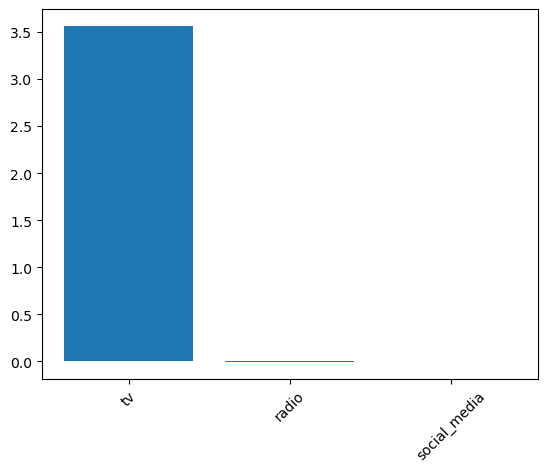

In [27]:
sales_columns = ['tv', 'radio', 'social_media'] 
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regression model
lasso = Lasso(alpha=0.3)

# Fit the model to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)
plt.bar(sales_columns, lasso_coef)
plt.xticks(rotation=45)
plt.show()

See how the figure makes it clear that expenditure on TV advertising is the most important feature in the dataset to predict sales values! In the next chapter, we will learn how to further assess and improve our model's performance!